In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    return data[np.random.choice(data.shape[0], k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    num_samples = data.shape[0]
    num_clusters = mu.shape[0]
    distance_matrix = np.empty((num_samples, 0))
    for k_th_cluster in range(num_clusters):
        distance_matrix = np.append(distance_matrix,
                                    np.sum((data - mu[k_th_cluster]) ** 2., axis = 1).reshape((num_samples, 1)), 
                                    axis = 1)
    return distance_matrix

#### Update k-means parameters

In [5]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    num_samples = data.shape[0] 
    num_features = data.shape[1]
    k = mu_old.shape[0]
    distance_matrix = build_distance_matrix(data, mu_old)
    assignment_vector = np.argmin(distance_matrix, axis = 1).reshape((num_samples, 1))
    losses = np.empty((0, 1))
    for i in range(num_samples):
        losses = np.append(losses, 
                           [[np.sum((data[i] - mu_old[assignment_vector[i]]) ** 2.)]],
                           axis = 0)
    mu_new = np.empty((0, num_features))
    for k_th_cluster in range(k):
        mu_new = np.append(mu_new, 
                           [np.mean(data[np.where(assignment_vector == k_th_cluster)[0]], axis = 0)], 
                           axis = 0)
    return losses, assignment_vector, mu_new

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 45.19660431985294.


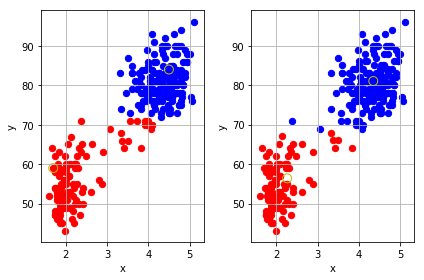

The current iteration of k-means is: 1,                the average loss is 33.97115028846499.


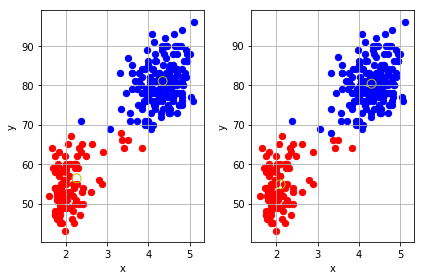

The current iteration of k-means is: 2,                the average loss is 32.73675733630585.


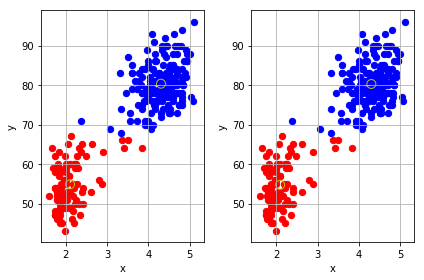

The current iteration of k-means is: 3,                the average loss is 32.72709088583533.


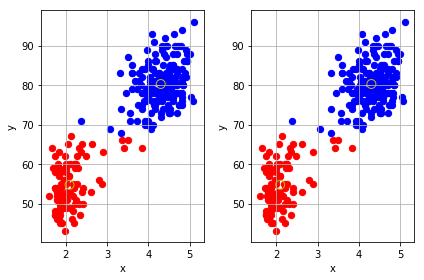

The current iteration of k-means is: 4,                the average loss is 32.72709088583533.


In [6]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compression

#### load image

In [7]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [8]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape((original_image.shape[0] * original_image.shape[1],
                                              original_image.shape[2]))
    processed_image = processed_image.astype(float)
    return processed_image

processed_image = preprocess_image(original_image)

The current iteration of kmeans is: 0, the average loss is 3953.535625.
The current iteration of kmeans is: 10, the average loss is 1677.9303006988403.
The current iteration of kmeans is: 20, the average loss is 1632.4739221428113.
The current iteration of kmeans is: 30, the average loss is 1631.973481101517.
The current iteration of kmeans is: 40, the average loss is 1631.969171589566.


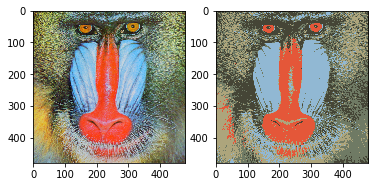

<Figure size 432x288 with 0 Axes>

In [9]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    loss_list = []
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if iter % 10 == 0:
            print("The current iteration of kmeans is: {i}, the average loss is {l}."
                  .format(i = iter, l = average_loss))
        if iter > 1 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)